## Interpreting abundances with chempy

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

/home/rybizki/anaconda3/lib/python3.6/site-packages/astropy/extern/bundled/six.py:60: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/rybizki/anaconda3/lib/python3.6/site-packages/astropy/extern/bundled/six.py' mode='r' encoding='utf-8'>
  class X(object):
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [3]:
data = Table.read('../data/STs_for_chempy.fits', format='fits')
el_names = data.colnames[3::2] # magic
err_names = data.colnames[4::2]


In [4]:
from Chempy.data_to_test import produce_wildcard_stellar_abundances

i = 0 # test
produce_wildcard_stellar_abundances(stellar_identifier = data['star_name'][i], 
                                     age_of_star = data['age'][i],
                                     sigma_age = data['age_err'][i],
                                     element_symbols = el_names, 
                                     element_abundances = data[el_names][i],
                                     element_errors = data[err_names][i])

In [5]:
from Chempy.parameter import ModelParameters
from Chempy.cem_function import cem

a = ModelParameters()
a.testing_output = True
a.summary_pdf = True
a.stellar_identifier = data['star_name'][i]
a.observational_constraints_index = ['wildcard']

/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


[-2.29 -2.75 -0.8  -0.3   0.55  0.5 ]


/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


model_temp/  already exists. Content might be overwritten
l:  -24810.009049098255 pr:  -0.000555555555556 po:  -24810.0096047


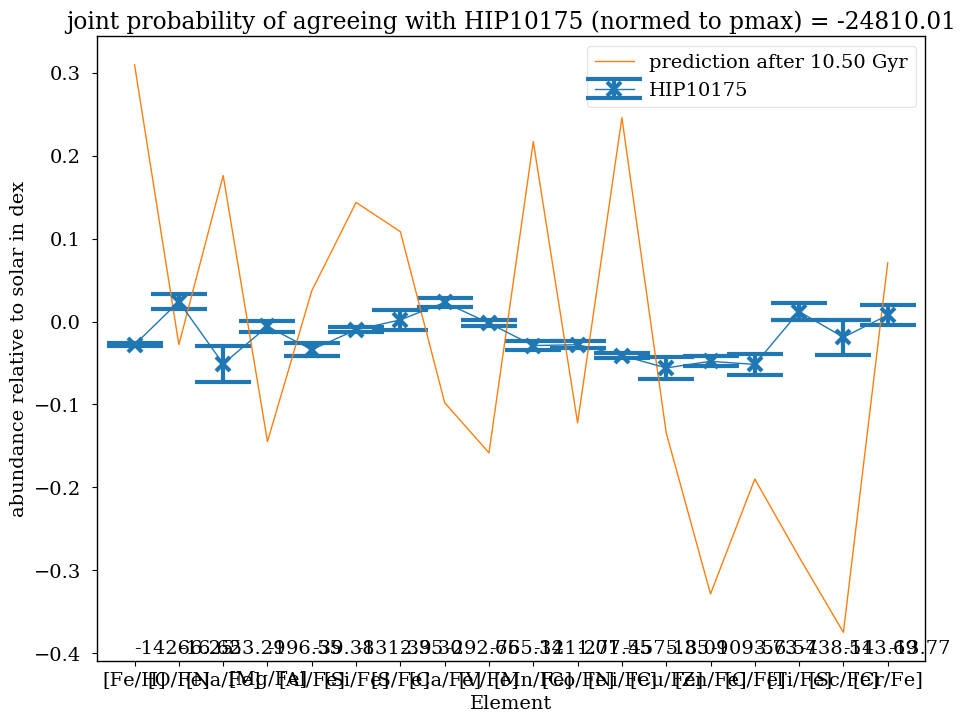

In [6]:
a.yield_table_name_sn2 = 'chieffi04_net'
a.yield_table_name_agb = 'Karakas_net_yield'
a.yield_table_name_1a = 'Seitenzahl'
a.sn2mmax = 40.
a.bhmmin = float(a.sn2mmax)
posterior, blobs = cem(a.p0,a)

In [7]:
from Chempy.wrapper import mcmc
a.testing_output = False
a.summary_pdf = False
a.nwalkers = 24
a.ndim = 6
print(a.to_optimize)
#mcmc(a) 

['high_mass_slope' 'log10_N_0' 'log10_sn1a_time_delay'
 'log10_starformation_efficiency' 'log10_sfr_scale'
 'outflow_feedback_fraction']


The chain has a length of 318 iterations, each iteration having 24 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
19.9312054754 6.46352262036
Mean posteriors after the burn-in tail is cut out:
19.9312054754 19.4527944563
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4988 iterations good enough posterior, their posteriors range from
4 runs of the stabilised MCMC had a posterior that was worse -15 ln
25.4369972912 11.3388008507
Highest posterior was obtained at parameters:  [[-2.47152861 -3.41203381 -0.97250475 -0.11301151  0.54503728  0.45756051]]
Number of unique posterior values:  1344
Inferred marginalized parameter distributions are:
0 -2.41590291334 +- 0.0988988083424
1 -3.21702616271 +- 0.265956417384
2 -0.786819156554 +- 0.289809790687
3 -0.178186981315 +- 0.254212420049
4 0.600846620918 +- 0.0920042435936
5 0.52538778753 +- 0.100296009293


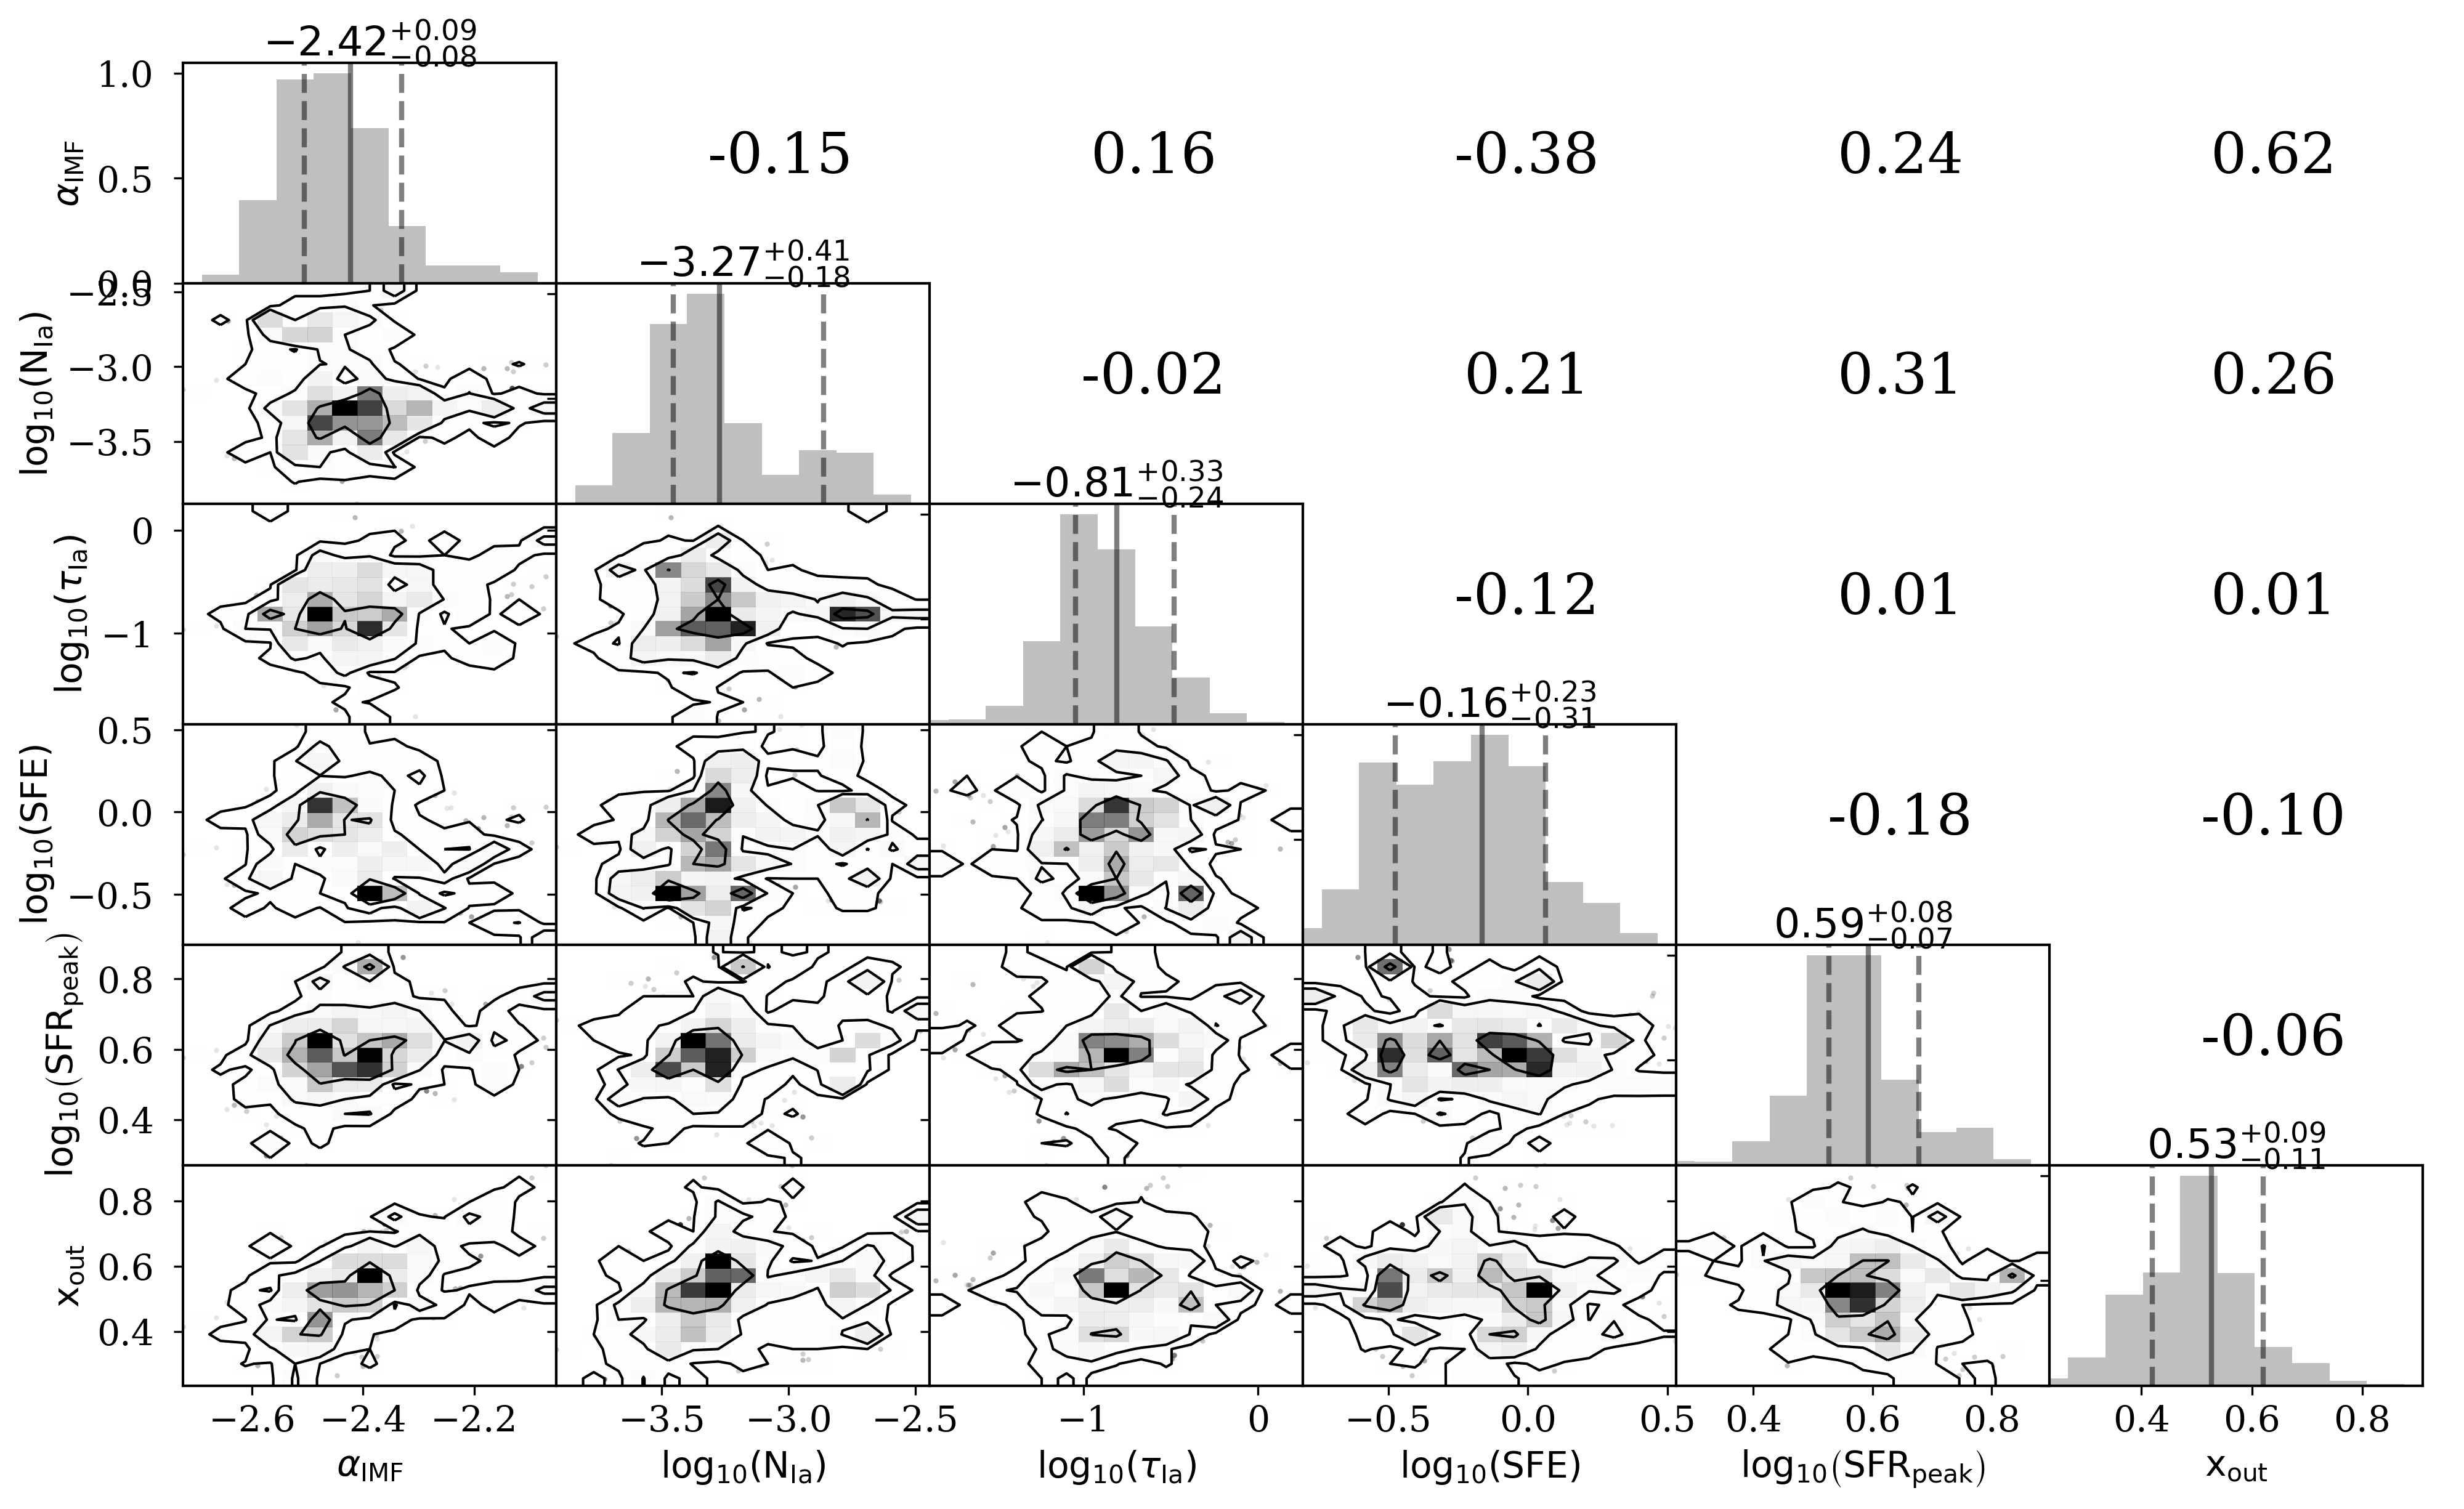

In [8]:


# This function shows MCMC convergence plots and restructures the chain (flattens it and throws out burn-in)

from Chempy.plot_mcmc import restructure_chain
restructure_chain('../mcmc/', a.parameter_names)



# Corner plot of the posterior distribution in comparison to the Prior
from Chempy.plot_mcmc import plot_mcmc_chain
plot_mcmc_chain('../mcmc/', use_scale = False)



[-2.42 -3.27 -0.81 -0.16  0.59  0.53]


/home/rybizki/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))


l:  -9179.487212932889 pr:  -1.81666666667 po:  -9181.3038796


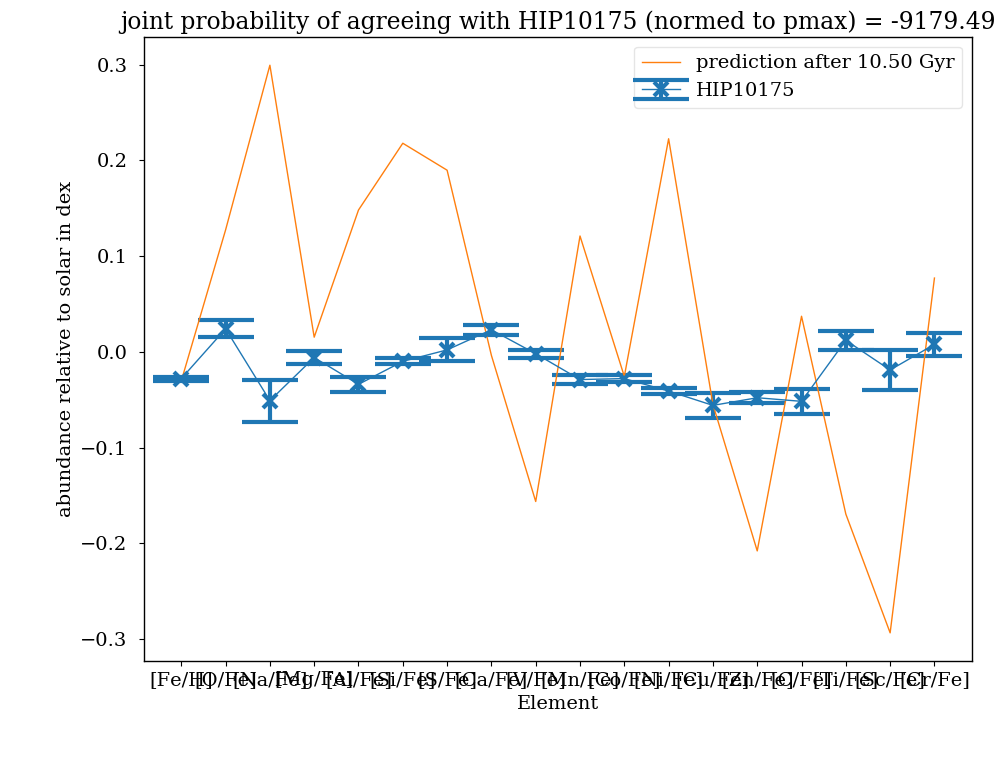

In [10]:
# best median posterior
a.testing_output = True
a.summary_pdf = True
p0 = np.array([-2.42, -3.27, -0.81, -0.16, 0.59, 0.53]) 
posterior, blobs = cem(p0,a)